# Importing modules

In [1]:
import MetaTrader5 as mt5
import functions as fp
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
from IPython.display import display, clear_output
from matplotlib.animation import FuncAnimation

## Connecting to MT5 server

In [2]:
mt5.initialize()

True

## Login to MT5

In [3]:
login = input('Enter your login: ')
password = input('Enter your password: ')
server = input('Enter the server name: ')

if not login:
    login = "SsaliBenjamin"

if not password:
    password = "PRKJRAYr"
    
if not server:
    server = "MetaQuotes-Demo"

# Use a default port value if the user does not provide input
port = input('Enter the server port: ')
if not port:
    port = 8222
else:
    port = int(port)

# Attempt to log in to the server and handle any errors that may occur
try:
    result = mt5.login(login, password, server, port)
    if result == 0:
        print('Successfully logged in')
    else:
        print('Login failed')
except Exception as e:
    print(f'An error occurred while attempting to log in: {e}')

Successfully logged in


## Getting data from high frequency server

In [4]:
# Get data for the past 24hrs
data = fp.fetchPastData(mt5)
# Filter data 
data = fp.filterData(data)
# Calculate EMA, RSI, ATR, and MACD 
data = fp.calcTools(data)
# Store in JSON
data.to_csv('./pastdata.csv', index=False)


## Create and store orders in order book.

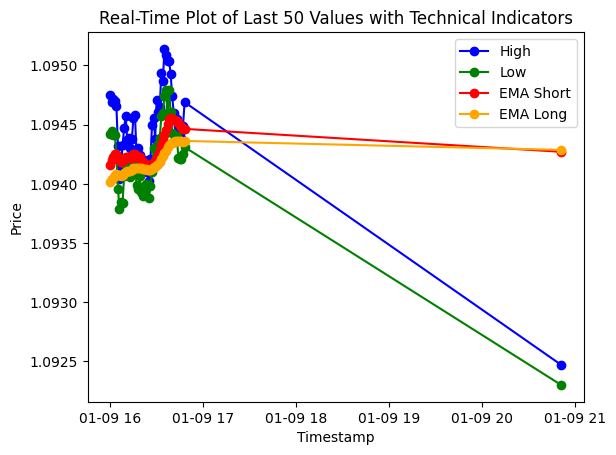

In [6]:
# Function to generate random data
def generate_random_data():
    timestamp = datetime.now()
    high = np.random.rand()
    low = np.random.rand()
    ema_short = np.random.rand()
    ema_long = np.random.rand()

    return pd.DataFrame({
        'timestamp': [timestamp],
        'high': [high],
        'low': [low],
        'EMA_short': [ema_short],
        'EMA_long': [ema_long]
    })

# Set up the initial plot
fig, ax = plt.subplots()

# Function to update the plot
def update():
    global data  # Use the global variable
    start_index = -50
    ax.clear()
    ax.plot(data['timestamp'].iloc[start_index:], data['high'].iloc[start_index:], label='High', linestyle='-', marker='o', color='blue')
    ax.plot(data['timestamp'].iloc[start_index:], data['low'].iloc[start_index:], label='Low', linestyle='-', marker='o', color='green')
    ax.plot(data['timestamp'].iloc[start_index:], data['EMA_short'].iloc[start_index:], label='EMA Short', linestyle='-', marker='o', color='red')
    ax.plot(data['timestamp'].iloc[start_index:], data['EMA_long'].iloc[start_index:], label='EMA Long', linestyle='-', marker='o', color='orange')
    ax.legend()
    ax.set_title("Real-Time Plot of Last 50 Values with Technical Indicators")
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("Price")
    # Display the updated plot in Jupyter Notebook
    display(fig)
    clear_output(wait=True)
    time.sleep(60)  # Pause for 1 second
    new_row = mt5.copy_rates_from("EURUSD", mt5.TIMEFRAME_M1, datetime.now(), 1)
    new_row = pd.DataFrame(new_row)
    new_row = fp.filterData(new_row)
    data.loc[data.index.max() + 1] = new_row.iloc[0]
    data = fp.calcTools(data)


# Continuous update loop
while True:
    update()

In [ ]:
data

## Shutdown MT5.

In [ ]:
mt5.shutdown()